In [2]:
import pandas as pd
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import ast
import re
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the dataset into the dataframe
df = pd.read_csv('data_preprocess.csv')

# include NLTK stopwords and custom_stop_words
stop_words = set(stopwords.words('english'))

custom_stop_words = set([
    "amp", "car", "drive", "driver", "bus", "say", "day", "new",
    "make", "know", "think", "people", "human", "autonomous", "turn","come",
    "vehicle", "use", "selfdriving", "im", "robot", "self","give",
    "like", "driveless","truck","get","go","one","see","would",
    "want","driverless","fsd","even","without","us","year","need","much",
    "also","take","thing","really","automate","full","could","new","around",
    "stop", "time", "way", "work", "right", "good","dont","never","every", 
    "come", "look", "well", "back", "still", "first","try","let","tell","leave"
])

stop_words = set(stopwords.words('english')).union(custom_stop_words)


Top 20 Most Common Words: [('road', 2951), ('tesla', 2922), ('transport', 1811), ('ai', 1734), ('pay', 1630), ('company', 1513), ('license', 1458), ('hit', 1436), ('run', 1404), ('police', 1402), ('system', 1369), ('call', 1366), ('service', 1349), ('traffic', 1335), ('van', 1262), ('kill', 1253), ('life', 1235), ('park', 1231), ('start', 1220), ('lane', 1201)]


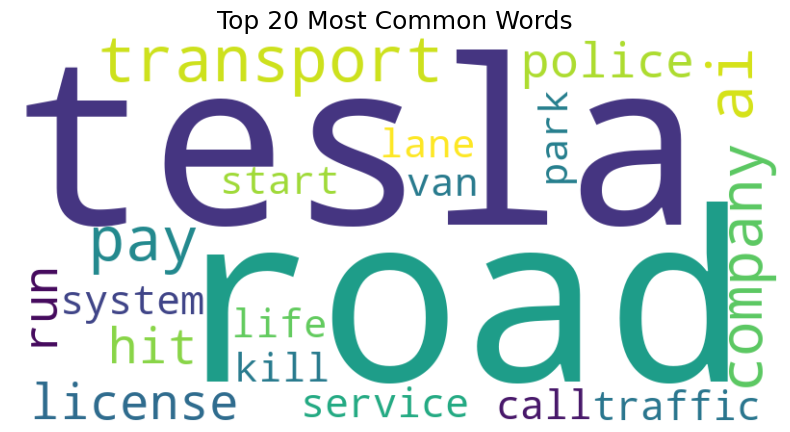

In [122]:
# 1. Top 20 most common words

# Function to get top 20 most common words
def get_top_words(content_column, stop_words, top_n=20):
    all_words = []
    for content in content_column:
        if pd.notna(content):
            words = content.split()  # Split the string into words
            filtered_words = [word for word in words if word.lower() not in stop_words]
            all_words.extend(filtered_words)
    
    word_freq = Counter(all_words)
    return word_freq.most_common(top_n)

# Calculate and print the top 20 most common words
top_20_words = get_top_words(df['processed_text'], stop_words)
print("Top 20 Most Common Words:", top_20_words)

# Generate word cloud for the top 20 words
def plot_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.show()

# Plot the word cloud for top 20 words
plot_wordcloud(top_20_words, "Top 20 Most Common Words")

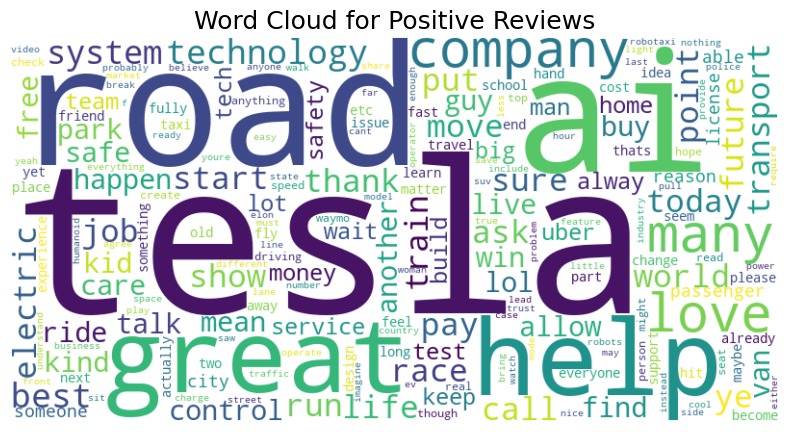

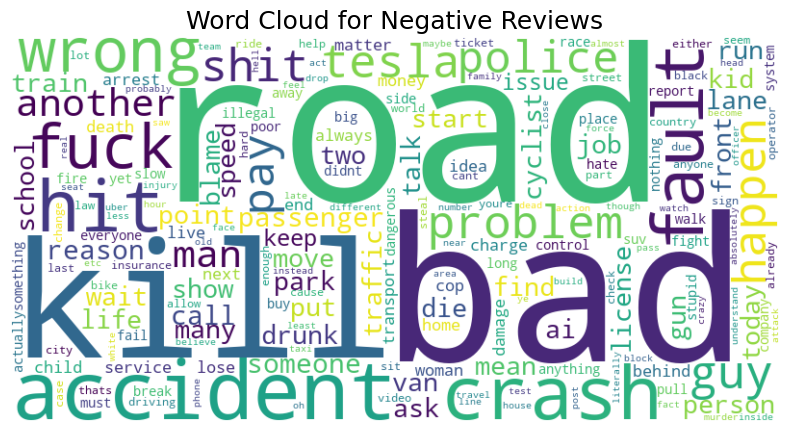

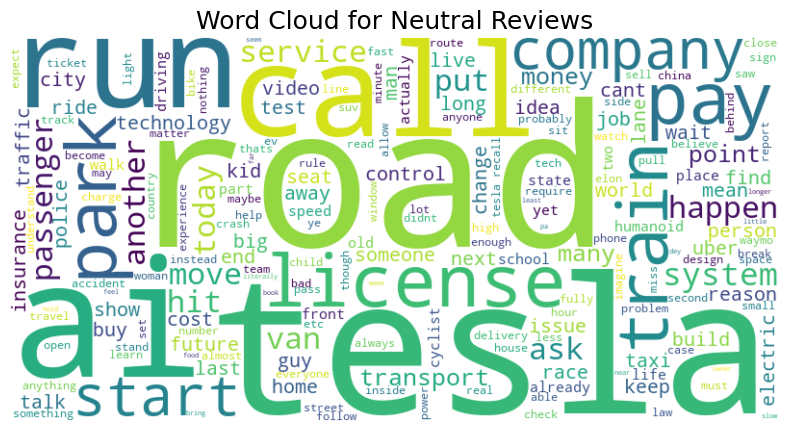

In [123]:
# 2. Sentimental word cloud for Positive and Negative labels

# re-initiliase my stop-words to avoid common words in my word clouds
stop_words = set(stopwords.words('english'))
custom_stop_words = set([
    "amp", "car", "drive", "driver", "bus", "say", "day", "new",
    "make", "know", "think", "people", "human", "autonomous", "turn","come",
    "vehicle", "use", "selfdriving", "im", "robot", "self","give",
    "like", "driveless","truck","get","go","one","see","would",
    "want","driverless","fsd","even","without","us","year","need","much",
    "also","take","thing","really","automate","full","could","new","around",
    "stop", "time", "way", "work", "right", "good","dont","never","every", 
    "come", "look", "well", "back", "still", "first","try","let","tell","leave"
])

stop_words = set(stopwords.words('english')).union(custom_stop_words)

# Function to clean and filter words
def clean_text_words(text, stop_words):
    cleaned_words = []
    for review_text in text:
        if pd.notna(review_text):  # Check if the review is not NaN
            # Remove punctuation and special characters, and convert to lowercase
            review = review_text.lower()
            review = re.sub(f'[{string.punctuation}]', ' ', review)  # Remove punctuation
            review = re.sub(r'\s+', ' ', review)  # Remove extra spaces
            
            # Tokenize each review (split into words)
            words = review.split()
            # Remove stop words
            filtered_words = [word for word in words if word not in stop_words]
            cleaned_words.extend(filtered_words)
    return cleaned_words

# Function to generate and plot word cloud
def plot_wordcloud(cleaned_words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cleaned_words))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.show()

# Apply the cleaning process to the positive and negative reviews
positive_reviews = df[df['label'] == 'positive']['processed_text']
negative_reviews = df[df['label'] == 'negative']['processed_text']
neutral_reviews = df[df['label'] == 'neutral']['processed_text']

# Clean and filter the words
cleaned_positive_words = clean_review_words(positive_reviews, stop_words)
cleaned_negative_words = clean_review_words(negative_reviews, stop_words)
cleaned_neutral_words = clean_review_words(neutral_reviews, stop_words)

# Plot word clouds for cleaned positive and negative reviews
plot_wordcloud(cleaned_positive_words, "Word Cloud for Positive Reviews")
plot_wordcloud(cleaned_negative_words, "Word Cloud for Negative Reviews")
plot_wordcloud(cleaned_neutral_words, "Word Cloud for Neutral Reviews") 

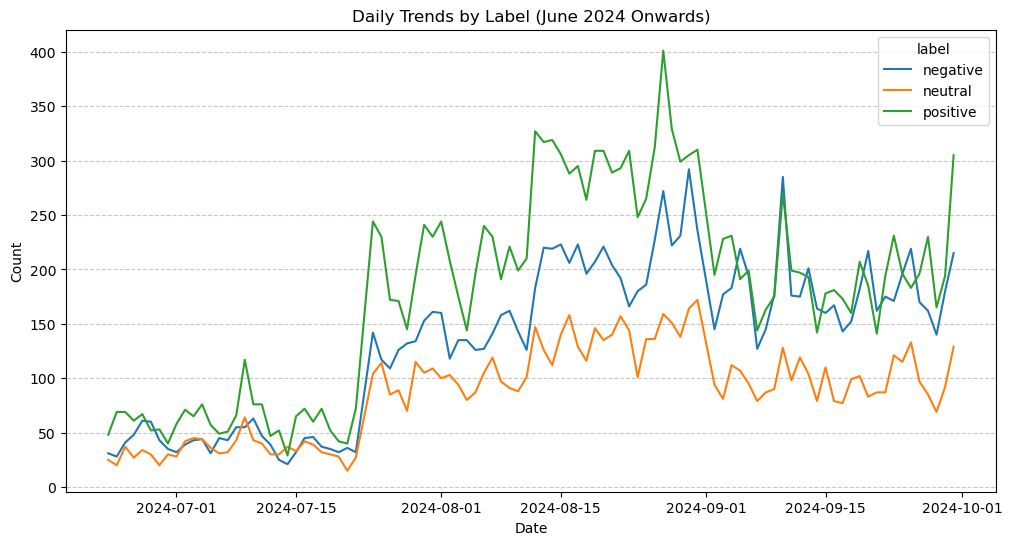

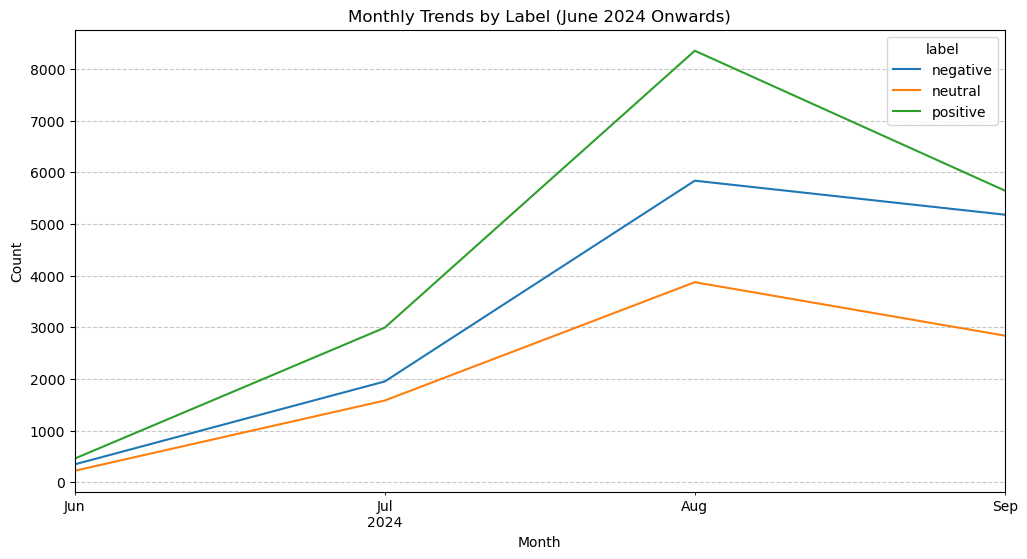

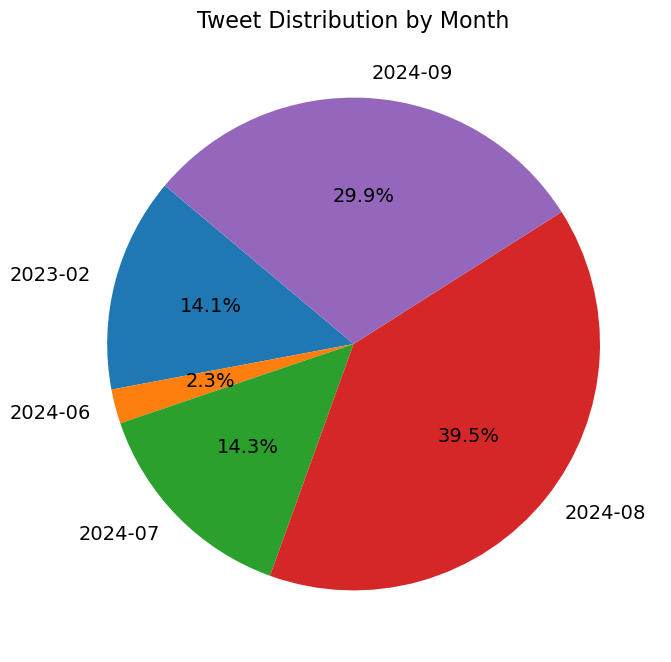

In [126]:
# 3. Time Series Analysis (Exploratory) for visualizing and understanding trends over time

# Ensure my time is in datetime formate
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Filter the dataset to keep only rows from 23 June 2024 onwards
filtered_df = df[df['time'] >= '2024-06-23']

# Verify the filtering
filtered_daily_trends = filtered_df.groupby([filtered_df['time'].dt.date, 'label']).size().unstack(fill_value=0)

# Plot daily trends for the filtered data
plt.figure(figsize=(12, 6))
filtered_daily_trends.plot(ax=plt.gca(), title='Daily Trends by Label (June 2024 Onwards)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Group by month for the filtered data
filtered_monthly_trends = filtered_df.groupby([filtered_df['time'].dt.to_period('M'), 'label']).size().unstack(fill_value=0)

# Plot monthly trends for the filtered data
plt.figure(figsize=(12, 6))
filtered_monthly_trends.plot(ax=plt.gca(), title='Monthly Trends by Label (June 2024 Onwards)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Group the data by month to calculate the total number of tweets for each month
monthly_tweet_counts = df['time'].dt.to_period('M').value_counts().sort_index()

# Create a pie chart for the monthly tweet counts
plt.figure(figsize=(8, 8))
plt.pie(
    monthly_tweet_counts,
    labels=monthly_tweet_counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 14}
)
plt.title('Tweet Distribution by Month', fontsize=16)
plt.show()

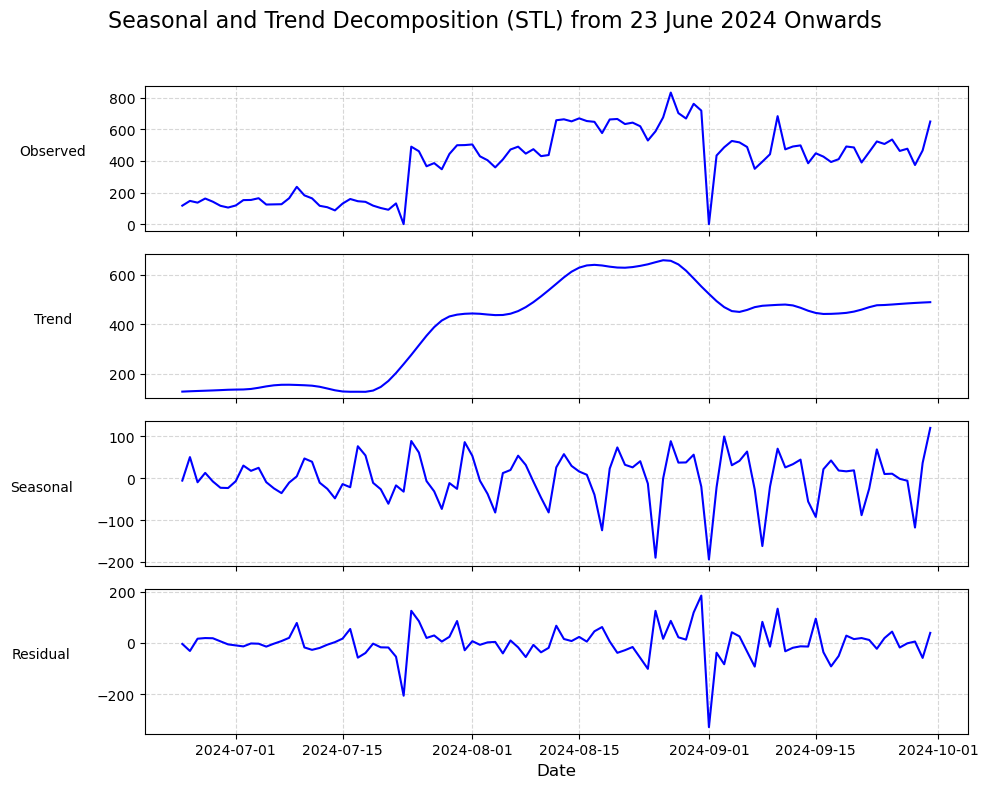

In [127]:
# 4 . Time Series Analysis (Seasonal and Trend Decomposition)

from statsmodels.tsa.seasonal import STL

# Aggregate the data by day to prepare for STL decomposition
daily_tweet_counts = df['time'].dt.to_period('D').value_counts().sort_index()
daily_tweet_counts.index = daily_tweet_counts.index.to_timestamp()  # Convert PeriodIndex to Timestamp

# Filter the data to include only from 23 June 2024 onwards where the collected twitter tweets really starts
filtered_daily_tweet_counts = daily_tweet_counts[daily_tweet_counts.index >= '2024-06-24']

# Reindex to ensure all dates are present, filling missing values with 0
filtered_daily_tweet_counts = filtered_daily_tweet_counts.asfreq('D', fill_value=0)

# Perform STL decomposition on the filtered data
stl_filtered = STL(filtered_daily_tweet_counts, seasonal=7)  # Assuming weekly seasonality
result_filtered = stl_filtered.fit()

# Plot the STL decomposition for filtered data
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Extract components
components = ['Observed', 'Trend', 'Seasonal', 'Residual']
data_components = [
    filtered_daily_tweet_counts,
    result_filtered.trend,
    result_filtered.seasonal,
    result_filtered.resid,
]

# Plot each component
for ax, component, label in zip(axes, data_components, components):
    ax.plot(component, label=label, color='blue')
    ax.set_ylabel(label, fontsize=10, rotation=0, labelpad=40)
    ax.grid(True, linestyle='--', alpha=0.5)

axes[-1].set_xlabel('Date', fontsize=12)
plt.suptitle('Seasonal and Trend Decomposition (STL) from 23 June 2024 Onwards', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

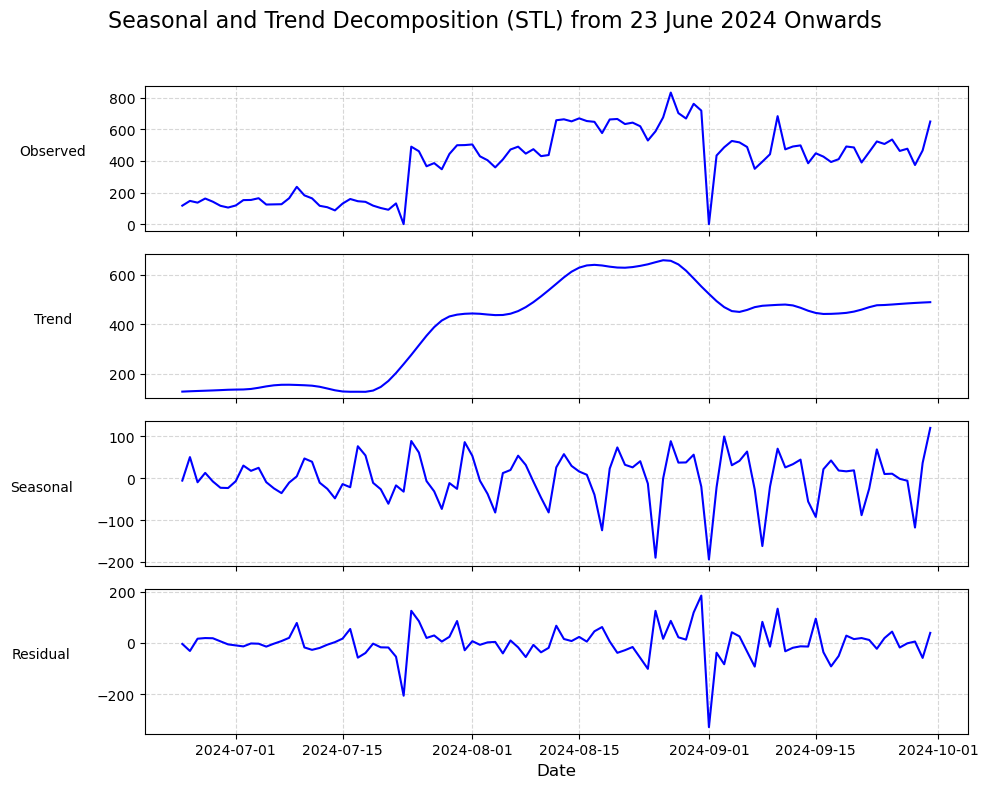

Peak Date Analysis:
Peak Date: 2024-08-27 00:00:00
Peak Observed Value: 832
Trend Component: 657.4749849275497
Seasonal Component: 88.78158267003565
Residual Component: 85.74343240241467
Reconstructed Value (Trend + Seasonal + Residual): 832.0

Peak Analysis Results:
Trend Peak Date: 2024-08-26 00:00:00
Trend Peak Value: 659.7370409967164
Seasonal Component at Trend Peak: -0.435010065544152
Day of Week (Trend Peak): Monday
Seasonal Peak Date: 2024-09-30 00:00:00
Seasonal Peak Value: 120.52782258265702
Day of Week (Seasonal Peak): Monday


In [4]:
# 4.1 . Time Series Analysis (Seasonal and Trend Decomposition)
# adding Lecturer Feedback during presentation to find out the day of the seasonal peak and adding component rating for better understanding

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Ensure the 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Aggregate the data by day to prepare for STL decomposition
daily_tweet_counts = df['time'].dt.to_period('D').value_counts().sort_index()
daily_tweet_counts.index = daily_tweet_counts.index.to_timestamp()  # Convert PeriodIndex to Timestamp

# Filter the data to include only from 23 June 2024 onwards
filtered_daily_tweet_counts = daily_tweet_counts[daily_tweet_counts.index >= '2024-06-24']

# Reindex to ensure all dates are present, filling missing values with 0
filtered_daily_tweet_counts = filtered_daily_tweet_counts.asfreq('D', fill_value=0)

# Perform STL decomposition on the filtered data
stl_filtered = STL(filtered_daily_tweet_counts, seasonal=7)  # Assuming weekly seasonality
result_filtered = stl_filtered.fit()

# Plot the STL decomposition for filtered data
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Extract components
components = ['Observed', 'Trend', 'Seasonal', 'Residual']
data_components = [
    filtered_daily_tweet_counts,
    result_filtered.trend,
    result_filtered.seasonal,
    result_filtered.resid,
]

# Plot each component
for ax, component, label in zip(axes, data_components, components):
    ax.plot(component, label=label, color='blue')
    ax.set_ylabel(label, fontsize=10, rotation=0, labelpad=40)
    ax.grid(True, linestyle='--', alpha=0.5)

axes[-1].set_xlabel('Date', fontsize=12)
plt.suptitle('Seasonal and Trend Decomposition (STL) from 23 June 2024 Onwards', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Identify the peak observed value and its components
peak_date = filtered_daily_tweet_counts.idxmax()  # Date with the highest tweet count
peak_value = filtered_daily_tweet_counts.max()   # Maximum observed value

# Extract the trend, seasonal, and residual components for the peak date
seasonal_value_at_peak = result_filtered.seasonal.loc[peak_date]
trend_value_at_peak = result_filtered.trend.loc[peak_date]
residual_value_at_peak = result_filtered.resid.loc[peak_date]

# Display the peak information
peak_info = {
    "Peak Date": str(peak_date),
    "Peak Observed Value": peak_value,
    "Trend Component": trend_value_at_peak,
    "Seasonal Component": seasonal_value_at_peak,
    "Residual Component": residual_value_at_peak,
    "Reconstructed Value (Trend + Seasonal + Residual)": trend_value_at_peak + seasonal_value_at_peak + residual_value_at_peak
}

print("Peak Date Analysis:")
for key, value in peak_info.items():
    print(f"{key}: {value}")

# Find the peak trend value and its date
trend_peak_date = result_filtered.trend.idxmax()  # Date with the maximum trend value
trend_peak_value = result_filtered.trend.max()    # Maximum trend value

# Find the seasonal component on the trend peak date
seasonal_value_at_trend_peak = result_filtered.seasonal.loc[trend_peak_date]

# Identify the day of the week for the trend peak date
day_of_week_at_trend_peak = trend_peak_date.strftime('%A')  # Converts date to day of the week

# Identify the date of the seasonal peak
seasonal_peak_date = result_filtered.seasonal.idxmax()  # Date with the maximum seasonal value
seasonal_peak_value = result_filtered.seasonal.max()    # Maximum seasonal value

# Identify the day of the week for the seasonal peak
day_of_week_at_seasonal_peak = seasonal_peak_date.strftime('%A')  # Converts date to day of the week

# Display the results
peak_analysis = {
    "Trend Peak Date": str(trend_peak_date),
    "Trend Peak Value": trend_peak_value,
    "Seasonal Component at Trend Peak": seasonal_value_at_trend_peak,
    "Day of Week (Trend Peak)": day_of_week_at_trend_peak,
    "Seasonal Peak Date": str(seasonal_peak_date),
    "Seasonal Peak Value": seasonal_peak_value,
    "Day of Week (Seasonal Peak)": day_of_week_at_seasonal_peak
}

print("\nPeak Analysis Results:")
for key, value in peak_analysis.items():
    print(f"{key}: {value}")

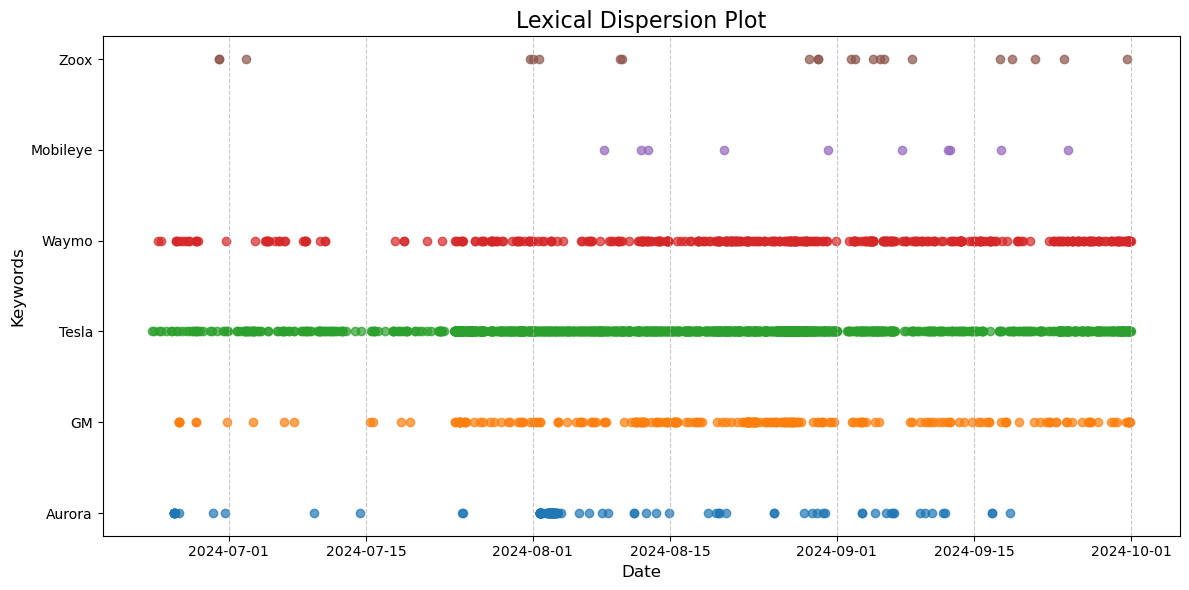

In [128]:
# 5. Lexical dispersion plot to show the distribution of words in the text

# Keywords of the 6 well-known companies/project to track in the dispersion plot
keywords = ['Aurora','GM','Tesla','Waymo','Mobileye' ,'Zoox']


# Extract tokens and associate with dates
lexical_data = []
for date, content in zip(filtered_df['time'], filtered_df['processed_text']):
    if pd.notna(content):
        content_lower = content.lower()  # Convert to lowercase for case-insensitive matching
        for keyword in keywords:
            if keyword.lower() in content_lower:  # Check if the full phrase exists
                lexical_data.append((date, keyword.lower()))

# Convert lexical data to a DataFrame for plotting
lexical_df = pd.DataFrame(lexical_data, columns=['Date', 'Word'])

# Create a Lexical Dispersion Plot
plt.figure(figsize=(12, 6))
for i, keyword in enumerate(keywords):
    occurrences = lexical_df[lexical_df['Word'] == keyword.lower()]
    plt.scatter(occurrences['Date'], [i] * len(occurrences), label=keyword, alpha=0.7)

# Plot out
plt.yticks(range(len(keywords)), keywords)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Keywords', fontsize=12)
plt.title('Lexical Dispersion Plot', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


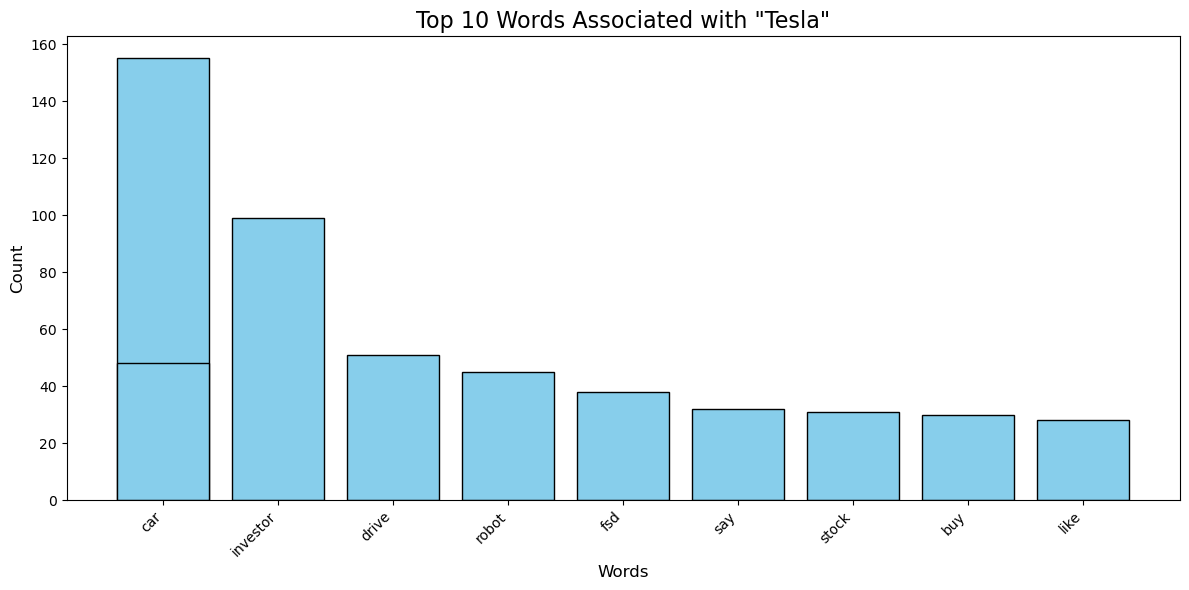

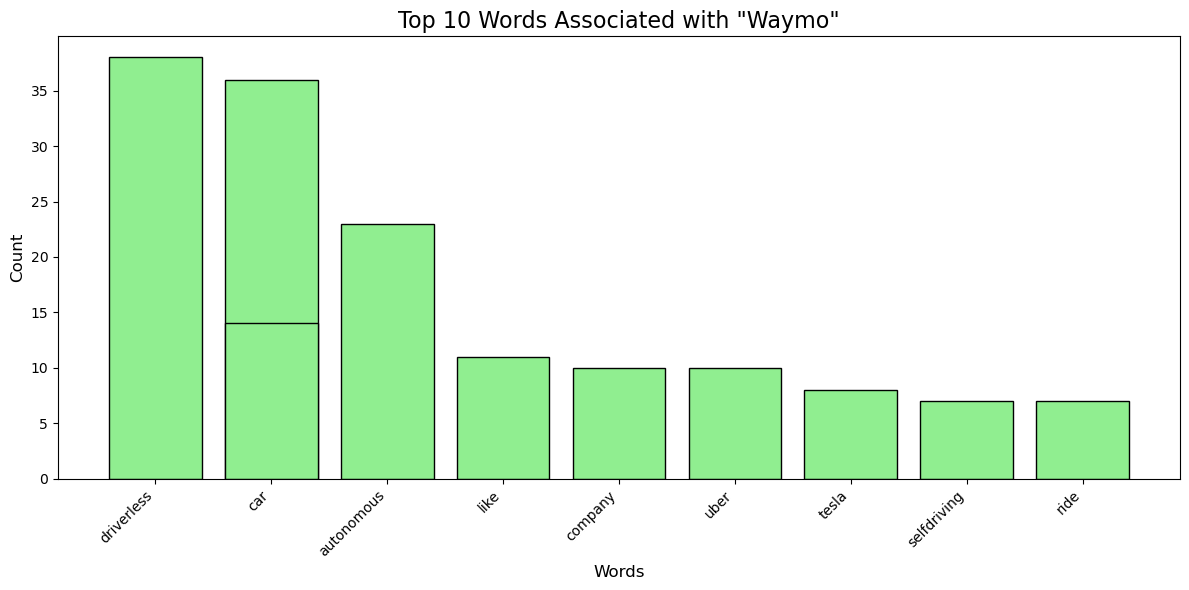

In [129]:
# 6. Bigram of my top 2 key words frequency in Lexical Dispersion Plot to find the associate words for analysis

from nltk import bigrams

# Step 1: Regenerate bigram counts from the original text data without altering case
bigram_counts = Counter()
for content in filtered_df['processed_text']:
    if pd.notna(content):  # Check for valid content
        words = content.split()  # Tokenize without converting to lowercase
        bigram_counts.update(bigrams(words))  # Generate and count bigrams

# Step 2: Filter and process bigrams for "Tesla" and "Waymo"
tesla_bigrams = [
    (bigram, count)
    for bigram, count in bigram_counts.items()
    if "tesla" in bigram
]
waymo_bigrams = [
    (bigram, count)
    for bigram, count in bigram_counts.items()
    if "waymo" in bigram
]

# Remove "Tesla" and "Waymo" from the bigrams as I only want to find other associate words instead of it repeating itself
cleaned_tesla_bigrams = [
    ((bigram[0] if bigram[1] == "tesla" else bigram[1]), count)
    for bigram, count in tesla_bigrams
]
cleaned_waymo_bigrams = [
    ((bigram[0] if bigram[1] == "waymo" else bigram[1]), count)
    for bigram, count in waymo_bigrams
]

# Step 3: Sort and keep the top 10 for each bigrams
sorted_tesla_bigrams = sorted(cleaned_tesla_bigrams, key=lambda x: x[1], reverse=True)[:10]
sorted_waymo_bigrams = sorted(cleaned_waymo_bigrams, key=lambda x: x[1], reverse=True)[:10]

# Step 4: Plot Tesla bigrams
tesla_labels = [bigram for bigram, count in sorted_tesla_bigrams]
tesla_values = [count for bigram, count in sorted_tesla_bigrams]

plt.figure(figsize=(12, 6))
plt.bar(tesla_labels, tesla_values, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 10 Words Associated with "Tesla"', fontsize=16)
plt.tight_layout()
plt.show()

# Step 5: Plot Waymo bigrams
waymo_labels = [bigram for bigram, count in sorted_waymo_bigrams]
waymo_values = [count for bigram, count in sorted_waymo_bigrams]

plt.figure(figsize=(12, 6))
plt.bar(waymo_labels, waymo_values, color='lightgreen', edgecolor='black')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 10 Words Associated with "Waymo"', fontsize=16)
plt.tight_layout()
plt.show()
